# 교차 검증(cross_val_score) 

In [1]:
from sklearn.datasets import load_iris #데이터 가져오기
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.linear_model import Ridge #학습 / 예측
from sklearn.model_selection import train_test_split 

In [4]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88, test_size=0.2)

In [17]:
model = Ridge()

In [18]:
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.931759772196454
0.9213349739328299


In [30]:
lin_ridge = Ridge()
result = cross_val_score(lin_ridge, X_train, y_train, cv=5) #cv = 분할개수
print(result) # 스코어가 다르다!

[0.93072044 0.92322602 0.9303329  0.94447198 0.89210069]


In [31]:
result.mean()

0.9241704052400926

In [33]:
alpha_list = [0.01, 0.1, 1.0, 10, 100, 1000]

for a in alpha_list :
    lin_ridge = Ridge(alpha=a)
    result = cross_val_score(lin_ridge, X_train, y_train, cv=3)
    print("{} :: {}".format(a, result.mean()))

0.01 :: 0.926350940046745
0.1 :: 0.9264682310723367
1.0 :: 0.9264327506532967
10 :: 0.9146673119356926
100 :: 0.8489410798622012
1000 :: 0.38925161515737755


### 분류 평가 지표
 - TN  FP
 - FN  TP
 
 - 정확도 = (TP + TN) / (TP + TN + FP + FN)
 - 재현율(Recall) = TP / TP + FN
 - 정밀도(Precision) = TP / TP + FP
 - F1-score = 2 (Precision * recall) / (Precision + recall)
 
 - FPR(재현율과 반대) = FP / FP + TN (낮을수록 좋음)

## 실습 

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [115]:
model = LogisticRegression(C = 10)

In [116]:
model.fit(X_train, y_train)

C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
pre = model.predict(X_test)

In [96]:
import numpy as np

In [97]:
np.bincount(pre) #예측

array([ 40, 103], dtype=int32)

In [101]:
np.bincount(y_test) #실제값

array([45, 98], dtype=int32)

In [102]:
from sklearn import metrics

#### 0, 0 : 진짜 악성, 예측 악성
#### 0, 1 : 진짜 악성, 예측 양성
#### 1, 0 : 진짜 양성, 예측 악성
#### 1, 1 : 진짜 양성, 예측 양성

In [103]:
metrics.confusion_matrix(y_test, model.predict(X_test)) #분류 평가 지표

array([[39,  6],
       [ 1, 97]], dtype=int64)

In [104]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        45
           1       0.94      0.99      0.97        98

   micro avg       0.95      0.95      0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



## ROC 곡성 그리기 

In [105]:
from sklearn.metrics import roc_curve

In [106]:
fpr, tpr, th = roc_curve(y_test, model.decision_function(X_test))

In [114]:
fpr1, tpr1, th1 = roc_curve(y_test, model.decision_function(X_test))

In [118]:
fpr2, tpr2, th2 = roc_curve(y_test, model.decision_function(X_test))

In [91]:
import matplotlib.pyplot as plt

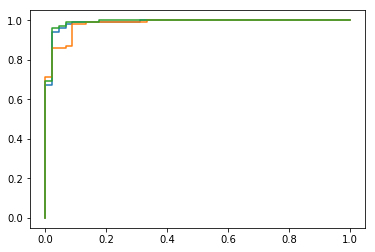

In [119]:
plt.plot(fpr, tpr) #ROC 커브! 
plt.plot(fpr1, tpr1) #면적이 더 넓은 쪽이 더 적합하다. 1이 0.1보다 낫다는 소리임
plt.plot(fpr2, tpr2)

In [126]:
C_list = [0.1, 1, 10, 100, 1000, 10000, 100000]
fpr_list = []
tpr_list = []
for c in C_list :
    model = LogisticRegression(C=c)
    result = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    fpr, tpr, th = roc_curve(y_test, model.decision_function(X_test)) #먼저 fit을 해야 함
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    print(result.mean())

C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

0.9414481141293727
0.9484789264543027
0.9624877858119992
0.9623770438407921
0.9695199009836493
0.9647579962217445
0.9648687381929516


C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


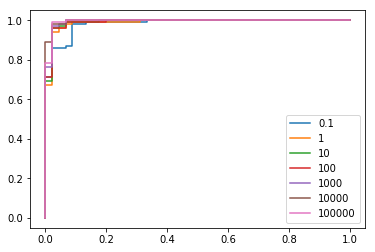

In [131]:
for fprT, tprT, c in zip(fpr_list, tpr_list, C_list) : #zip 하나씩 뺴주고 싶을떄? range 
    plt.plot(fprT, tprT, label = c)
plt.legend()

In [132]:
len(fpr_list), len(tpr_list)

(7, 7)

### 오늘의 결론
- 우선 할수 있는 모든 함수를 쓰고
- 교차 검정을 하고
- 그중 좋은 걸 쓰자